In [1]:
import glob
from tools.compress import load

data = []

for file in glob.glob("./results-bdi*.json"):
    print(file)
    try:
        d = load(file)
    except Exception:
        continue
    for experiment in d:
        if not len(experiment["probas"]):
            continue
        for proba in experiment["probas"]:
            data.append({
                "proba": proba,
                "support": 1,
                "gap": experiment["gap"],
                "year": experiment["date"],
                "author": experiment["author"].title()
            })


./results-bdi-G15.json
./results-bdi-G10.json
./results-bdi-G-10.json
./results-bdi-G-1.json
./results-bdi-G-5.json
./results-bdi-G-15.json
./results-bdi-G5.json
./results-bdi-Grandom.json
./results-bdi-G1.json


In [2]:
import pandas as pd

df = pd.DataFrame(data)
df = df.sort_values(["gap", "author"])
df["mean"] = df.groupby(["gap", "year", "author"])["proba"].transform(lambda x: x.mean())
df["support"] = df.groupby(["gap", "year", "author"])["mean"].transform(lambda x: x.count())
df = df.drop_duplicates(["gap", "year", "author"])[["mean", "support", "gap", "year", "author"]]
df.columns = ['Accuracy', 'Query Size', 'Gap', 'Date', 'Author']
df

,Accuracy,Query Size,Gap,Date,Author
23694,0.970180,50,-15,1844,Balzac
24023,0.985820,50,-15,1846,Balzac
24123,0.994138,29,-15,1848,Balzac
24329,0.989780,50,-15,1847,Balzac
23991,0.905844,32,-15,1854,Dumas
...,...,...,...,...,...
36578,0.997020,150,random,1878,Zola
36877,0.960729,144,random,1874,Zola
37374,0.993556,81,random,1888,Zola
38676,0.992660,150,random,1876,Zola


In [3]:
df[df.duplicated(["Date", "Gap", "Author"], False)].sort_values(["Gap", "Date"])

,Accuracy,Query Size,Gap,Date,Author


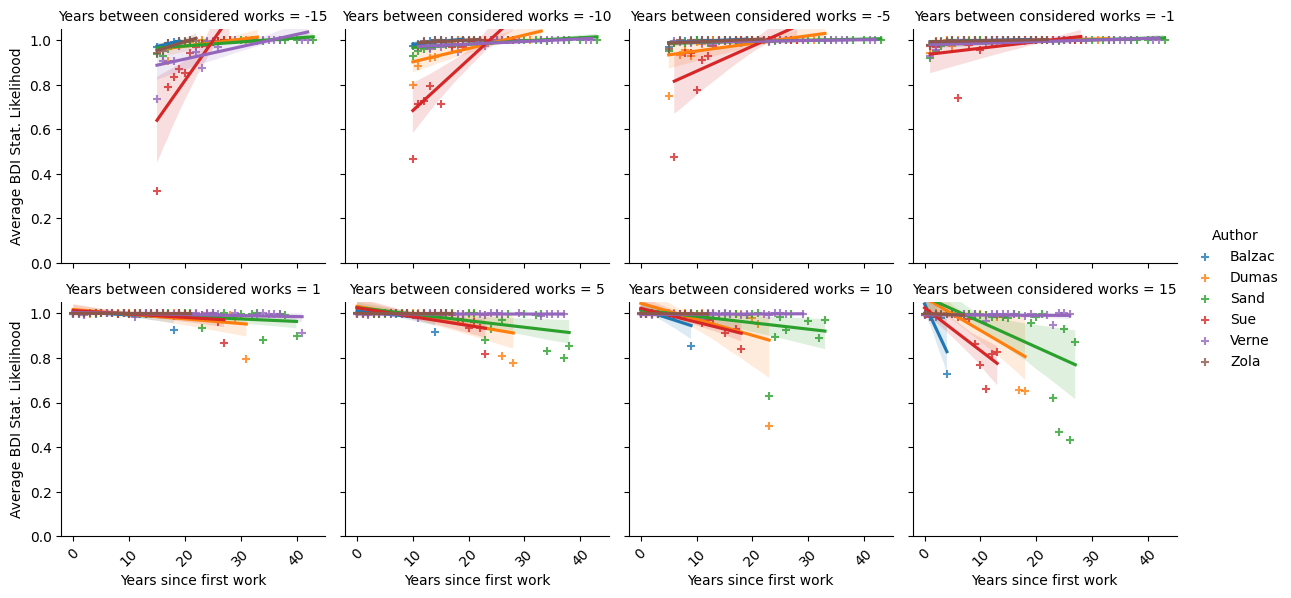

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
df['Year (Relative to start of career)'] = df.groupby("Author")["Date"].transform(lambda x: x - x.min())

# Create a FacetGrid with one facet per 'gap' value
g = sns.FacetGrid(df[df.Gap != "random"], col="Gap", hue="Author", sharey=True, sharex=True, col_wrap=4)

# Map a lineplot to each facet
g.map(sns.regplot, "Year (Relative to start of career)", "Accuracy", marker="+")

# Add a legend
g.add_legend()

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.set_xlabel("Years since first work")
    ax.set_ylabel("Average BDI Stat. Likelihood")
    ax.set_ylim(0, 1.05)
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_titles(col_template="Years between considered works = {col_name}")

# Adjust layout
# g.tight_layout()

plt.savefig("normalized_plot_bdi.png", dpi=300, bbox_inches='tight')
plt.show()


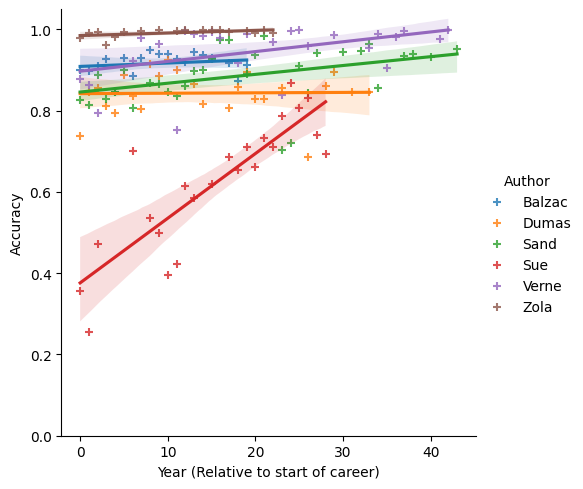

In [6]:
sns.lmplot(data=df[df.Gap=="random"], x="Year (Relative to start of career)", y="Accuracy", hue="Author", markers="+")
plt.ylim(0, 1.05)
plt.savefig("normalized_bdi_control.png", dpi=300, bbox_inches='tight')
plt.show()


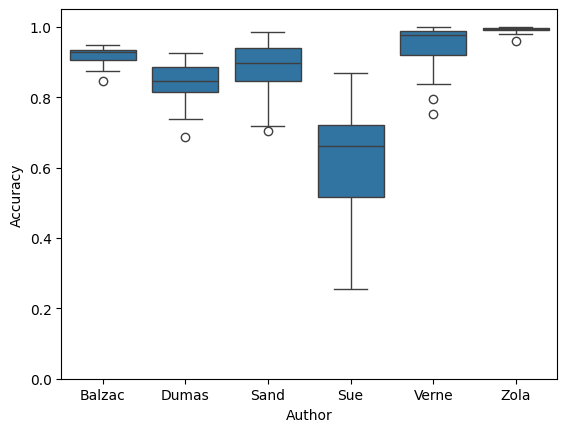

In [7]:

sns.boxplot(data=df[df.Gap=="random"], y="Accuracy", x="Author")
plt.ylim(0, 1.05)
plt.savefig("normalized_bdi_control_distrib.png", dpi=300, bbox_inches='tight')